In [1]:
import numpy as np 
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import networkx as nx

[nltk_data] Downloading package punkt to /home/darkness/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/darkness/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/darkness/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/darkness/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Pre Processing

### Text Retrival

In [2]:
f = open("Text.txt")
data = f.readlines()[10:]
data = data[:-13]
f.close()

In [3]:
data

['I’m on the couch, watching an Instagram reel of Holly Madison. She’s a former Playboy Bunny, model, and actress. You may recognize her from the movie, The House Bunny. She’s talking about her recent autism diagnosis at the age of 43.\n',
 'In the interview, Holly revealed: “I had been suspicious of it for a while. I always kind of had trouble socially, not recognizing social cues, not picking up on things the same way other people did. But I just made excuses for it. I was never somebody who was really well liked in all different situations.”\n',
 'She continues, “I think because I’m more quiet, I’ve only recently learned to make eye contact and I’m often off in my own thoughts, so people take that as offensive… I’m just not on the same social wavelength as other people. I wanted to get diagnosed because I always had a hard time connecting with others.”\n',
 'As Holly carries on with the interview and reveals more and more about her internal and social struggles, I turn to my husband

### Tokenization

In [4]:
# Sentence Splitting
sentences = []
for i in data:
    sentences += nltk.sent_tokenize(i)
for i in sentences:
    print(i)

print(len(sentences))
# Word Splitting
words_in_sentence = []
for i in sentences:
    words_in_sentence.append(nltk.word_tokenize(i))
# print(words_in_sentence)

I’m on the couch, watching an Instagram reel of Holly Madison.
She’s a former Playboy Bunny, model, and actress.
You may recognize her from the movie, The House Bunny.
She’s talking about her recent autism diagnosis at the age of 43.
In the interview, Holly revealed: “I had been suspicious of it for a while.
I always kind of had trouble socially, not recognizing social cues, not picking up on things the same way other people did.
But I just made excuses for it.
I was never somebody who was really well liked in all different situations.”
She continues, “I think because I’m more quiet, I’ve only recently learned to make eye contact and I’m often off in my own thoughts, so people take that as offensive… I’m just not on the same social wavelength as other people.
I wanted to get diagnosed because I always had a hard time connecting with others.”
As Holly carries on with the interview and reveals more and more about her internal and social struggles, I turn to my husband Tyler and say, “I d

In [5]:
Stop_word = stopwords.words('english')


words_nostop_in_sentence = []
for i in words_in_sentence:
    temp = [word for word in i if word not in Stop_word and word.isalnum()==True]
    words_nostop_in_sentence.append(temp)

### POS Tagging

In [6]:
POS = []
for i in words_nostop_in_sentence:
    POS.append(nltk.pos_tag(i))

### Lemmatization

In [7]:
root_per_sentence = []
obj = nltk.WordNetLemmatizer()

for i in words_nostop_in_sentence:
    temp  = [obj.lemmatize(j) for j in i ] 
    root_per_sentence.append(temp)

### Representation

In [8]:
def mag(vct):
    return np.sum(vct**2)

In [9]:
def ft_vector_similarity(v1,v2):
    return (np.dot(v1,v2.T) / ((mag(v1) * mag(v2))))[0][0]

In [10]:
from gensim.models import FastText
fmodel = FastText(sentences=root_per_sentence,min_count=1,vector_size=150,window=5,workers=5,epochs=100)
ft_vectors = [fmodel.wv[root_per_sentence[i]].sum(axis = 0).reshape(1,150) for i in range(len(root_per_sentence))]

In [11]:
MAT1 = np.array([[ft_vector_similarity(ft_vectors[j],ft_vectors[i]) if i!=j else 0 for i in range(len(ft_vectors))] for j in range(len(ft_vectors))])

In [12]:
def text_similarity(root_s1,root_s2,s1,s2):
    common_words = []
    
    for word in root_s1:
        if word in root_s2:
            common_words.append(word)
    similarity_score = len(common_words)/(np.log(len(s1)) + (np.log(len(s2))))
    return similarity_score

In [13]:
MAT2 = np.array([[text_similarity(root_per_sentence[i],root_per_sentence[j],words_in_sentence[i],words_in_sentence[j]) if i!=j else 0 for i in range(len(sentences))] for j in range(len(sentences))])

In [14]:
G = MAT1 + MAT2

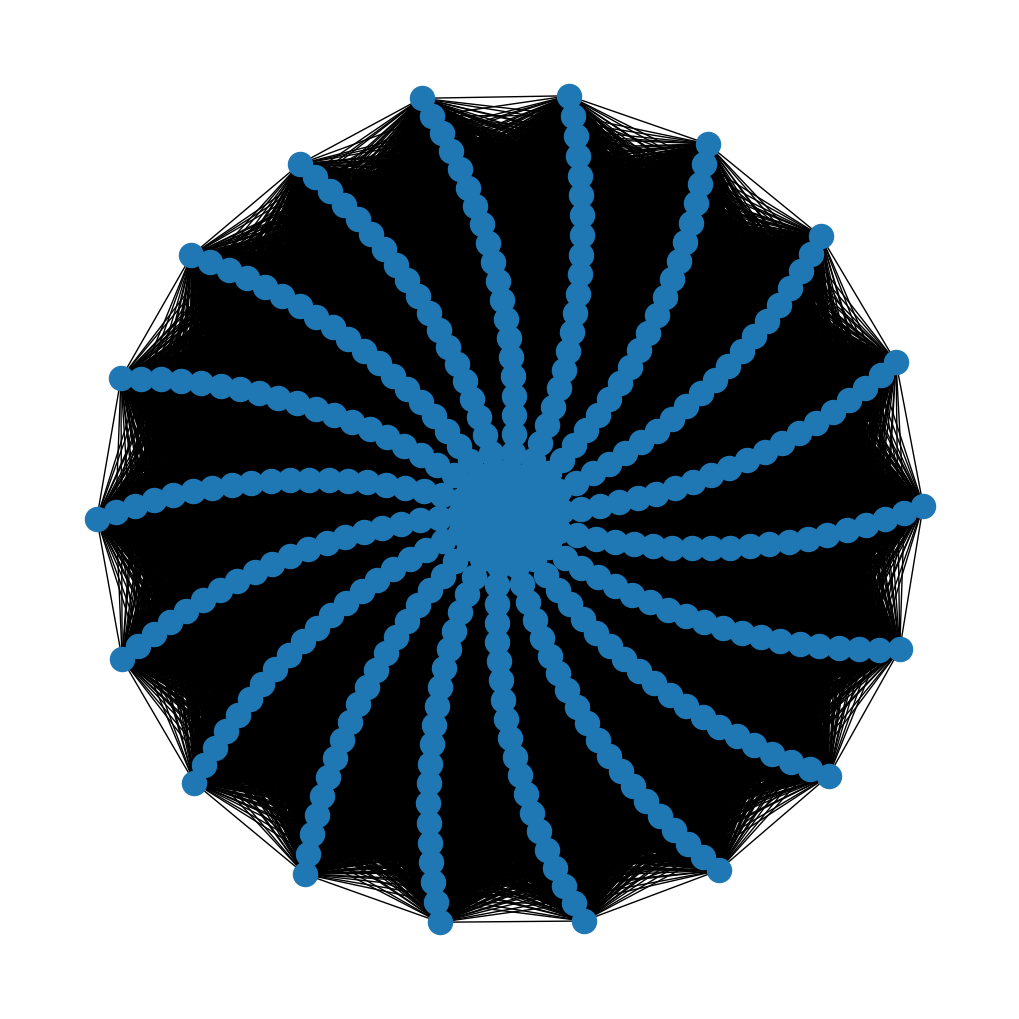

In [15]:
Graph = nx.from_numpy_array(G,create_using=nx.MultiGraph())
plt.figure(figsize=(10,10))
pos = nx.spiral_layout(Graph)
nx.draw(Graph,pos)
plt.show()

In [20]:
def PageRank(G,d,Prob):
    Page_Rank = [Prob for i in range(G.shape[0])]
    for i in range(0,G.shape[0]):
        Page_Rank[i] = ((1 -d)/G.shape[0]) +  d  * sum([Page_Rank[i]/(j+1) for j in G[i]])
    return {idx : Page_Rank[idx] for idx in range(G.shape[0]) }

In [21]:

pg = PageRank(G,d=0.85,Prob=0.5).items()
pg = sorted(pg,key=lambda x : x[1] ,reverse=True)
lengt = int(len(sentences) * 0.2)
sent = [pg[i][0] for i in range(lengt)]

In [22]:
for i in sent:
    print(sentences[i])

From a young age, we’re taught that busyness equates to value, but it’s problematic to link our intrinsic worth solely to productivity and activity.
Hives can serve as an indicator of potential autoimmune diseases.
Autism has the potential to serve as the adhesive that reunites some of those scattered pieces.
Every day was fraught with uncertainty–walking on eggshells to avoid triggering her volatile moods and unpredictable reactions.
Stimming serves various purposes including self-regulation.
Being wired differently is completely OK–being intolerant of differences is not.
Unfortunately, autistics are known for being unwilling or unable to homogenize.
Massive, itchy, burning welts all over my skin.
Autistics in general have a keen eye for detail, and a knack for logic.
Plus it can take many forms, such as hand-flapping, rocking, spinning, tapping, or vocalizing.
Miscommunication is basically a rite of passage for autistics.
Use hands to emphasize a pointStep 11.
She’s a former Playboy 

## END